# Applied Data Science Capstone
## Comparison of Cities - Karachi VS Islamabad
### Part of IBM Data Science Professional Specialization on Coursera

### Introduction:

During this capstone project we would be looking at Real Estate industry's data of two major cities in Pakistan, Karachi and Islamabad.

Karachi is the industrial hub of Pakistan with over 14.9 Million people of various groups, affiliations, backgrounds and ethnicities residing there.

On the other hand Islamabad is the capital of Pakistan which has seen growth in Real Estate industry in past 1-2 years as compared to other cities.

#### Data & Source:

Our dataset is taken from an online Real Estate portal "Zameen.com" which lists various real estate listing in various cities, including Karachi and Islamabad. The dataset has location data (longitude & latitude) for each listing, the type, size, value and amenities of each listing.

We shall utilize Foursquare API for segmentation and then use clustering algorithms to determine commonalities between various localities in our listing dataset.

#### Stakeholders:

This report will help potential buyers and investors in making educated decisions regarding their purchases or investment. Stakeholders for this report will be buyers, investors and Real Estate marketing portals.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import requests
import geocoder
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

import folium
from bs4 import BeautifulSoup
import lxml
from geopy.exc import GeocoderTimedOut
print('Libraries imported.')

Libraries imported.


#### Loading Dataset

In [2]:
data = pd.read_csv('Zameen_Property.csv', low_memory = False)
data.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,...,Unnamed: 300,Unnamed: 301,Unnamed: 302,Unnamed: 303,Unnamed: 304,Unnamed: 305,Unnamed: 306,Unnamed: 307,Unnamed: 308,Unnamed: 309
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000.0,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000.0,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000.0,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000.0,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000.0,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.shape

(179838, 310)

Since there are so many Columns with NaN values, we have to clean our dataset and get only the relevant columns, such "property_type" , "price", "location", "city", "latitude", "longitude", "area" and "purpose"

In [4]:
data_refined = data[['property_type','price','location','city','latitude','longitude','area','purpose']]
data_refined.head()

,property_type,price,location,city,latitude,longitude,area,purpose
0,Flat,10000000.0,G-10,Islamabad,33.679890,73.012640,4 Marla,For Sale
1,Flat,6900000.0,E-11,Islamabad,33.700993,72.971492,5.6 Marla,For Sale
2,House,16500000.0,G-15,Islamabad,33.631486,72.926559,8 Marla,For Sale
3,House,43500000.0,Bani Gala,Islamabad,33.707573,73.151199,2 Kanal,For Sale
4,House,7000000.0,DHA Defence,Islamabad,33.492591,73.301339,8 Marla,For Sale


In [5]:
data_refined.shape

(179838, 8)

Next we will drop any rows that have NaN values in them

In [6]:
data_refined.dropna(inplace = True)
data_refined.shape

C:\Users\Eiwan 2019\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(167326, 8)

Out of the total of 179,838 entries in our dataset, 12,512 were dropped as they contained NaN values.

### Visualizing Property Size vs Property Price

Before we can do any sorts of visualization, we observe that entries in "area" columns, for property size are not in uniform dimensions and thus need to be converted to approperiate uniform dimension.

#### Separating Units of Size and Dimension of Size

In [7]:
data_refined_temp = data_refined
data_refined_temp_2 = data_refined_temp.area.str.split(expand = True)
data_refined_temp_2

,0,1
0,4,Marla
1,5.6,Marla
2,8,Marla
3,2,Kanal
4,8,Marla
5,1.6,Kanal
6,1,Kanal
7,6.2,Marla
8,1,Kanal
9,1,Kanal


In [8]:
data_refined_temp_2.dtypes

0    object
1    object
dtype: object

#### Renaming Temporary Dataframe's column names

In [9]:
data_refined_temp_2.columns = ["Value", "Dimension"]
data_refined_temp_2.head()

,Value,Dimension
0,4,Marla
1,5.6,Marla
2,8,Marla
3,2,Kanal
4,8,Marla


#### Correcting the Data Types

In [10]:
data_refined_temp_2 = data_refined_temp_2.astype({"Value": 'float', "Dimension": str})
data_refined_temp_2.dtypes

Value        float64
Dimension     object
dtype: object

#### Creating Dummy Variables for Dimensions

In [11]:
dummy = pd.get_dummies(data_refined_temp_2['Dimension'])
dummy.head()

,Kanal,Marla
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1


In [12]:
dummy.dtypes

Kanal    uint8
Marla    uint8
dtype: object

#### Getting Uniform Units/Dimensions for Size in Sq. Yards

In [13]:
data_refined_temp_2['Size_in_Sq_Yards'] = (data_refined_temp_2['Value'] * 30.2051 * dummy['Marla']) + (data_refined_temp_2['Value'] * 605 * dummy['Kanal'])
    
data_refined_temp_2.head()

,Value,Dimension,Size_in_Sq_Yards
0,4.0,Marla,120.82040
1,5.6,Marla,169.14856
2,8.0,Marla,241.64080
3,2.0,Kanal,1210.00000
4,8.0,Marla,241.64080


#### Dropping area columns from our original dataframe and adding Size in Sq. Yards

In [14]:
data_refined.drop(["area"], axis =1, inplace = True)
data_refined['Size_in_Sq_Yards'] = data_refined_temp_2['Size_in_Sq_Yards']
data_refined.head()

C:\Users\Eiwan 2019\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\Eiwan 2019\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,property_type,price,location,city,latitude,longitude,purpose,Size_in_Sq_Yards
0,Flat,10000000.0,G-10,Islamabad,33.679890,73.012640,For Sale,120.82040
1,Flat,6900000.0,E-11,Islamabad,33.700993,72.971492,For Sale,169.14856
2,House,16500000.0,G-15,Islamabad,33.631486,72.926559,For Sale,241.64080
3,House,43500000.0,Bani Gala,Islamabad,33.707573,73.151199,For Sale,1210.00000
4,House,7000000.0,DHA Defence,Islamabad,33.492591,73.301339,For Sale,241.64080


### Extracting Karachi and Islamabad listings

In [15]:
data_K_ISB_sale = data_refined.loc[((data_refined['city'] == "Islamabad") | (data_refined['city'] == "Karachi")) & 
                                   (data_refined['purpose'] == "For Sale")]
data_K_ISB_sale

,property_type,price,location,city,latitude,longitude,purpose,Size_in_Sq_Yards
0,Flat,10000000.0,G-10,Islamabad,33.679890,73.012640,For Sale,120.82040
1,Flat,6900000.0,E-11,Islamabad,33.700993,72.971492,For Sale,169.14856
2,House,16500000.0,G-15,Islamabad,33.631486,72.926559,For Sale,241.64080
3,House,43500000.0,Bani Gala,Islamabad,33.707573,73.151199,For Sale,1210.00000
4,House,7000000.0,DHA Defence,Islamabad,33.492591,73.301339,For Sale,241.64080
5,House,34500000.0,Ghauri Town,Islamabad,33.623947,73.126588,For Sale,968.00000
6,House,27000000.0,Korang Town,Islamabad,33.579034,73.139591,For Sale,605.00000
7,Flat,7800000.0,E-11,Islamabad,33.698244,72.984238,For Sale,187.27162
8,House,50000000.0,DHA Defence,Islamabad,33.540894,73.095732,For Sale,605.00000
9,Penthouse,40000000.0,F-11,Islamabad,33.679211,72.988787,For Sale,605.00000


### Sorting Data

In [16]:
data_K_ISB_sale.sort_values(by = ['Size_in_Sq_Yards'], inplace = True)
data_K_ISB_sale

C:\Users\Eiwan 2019\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,property_type,price,location,city,latitude,longitude,purpose,Size_in_Sq_Yards
31154,House,4400000.0,Malir,Karachi,24.893209,67.195473,For Sale,0.00000
140248,House,31500000.0,Bahria Town,Islamabad,33.692638,73.218813,For Sale,0.00000
137978,House,16500000.0,I-10,Islamabad,33.648922,73.038969,For Sale,0.00000
136545,House,25000000.0,PWD Housing Scheme,Islamabad,33.570792,73.145256,For Sale,3.02051
172232,House,1.0,PWD Road,Islamabad,33.567125,73.134901,For Sale,6.04102
74146,Flat,3200000.0,Gadap Town,Karachi,25.017951,67.136393,For Sale,6.04102
106430,House,300000000.0,F-8,Islamabad,33.716665,73.042209,For Sale,6.04102
177835,House,45000000.0,E-11,Islamabad,33.698244,72.984238,For Sale,12.08204
63891,Flat,2500000.0,Nishtar Road (Lawrence Road),Karachi,24.885121,67.030018,For Sale,12.08204
177527,Upper Portion,5500000.0,Rashid Minhas Road,Karachi,24.895994,67.119191,For Sale,12.08204


#### Dropping Values less than 20 Sq. Yards

Since the listing data on Zameen.com is not monitored and filtered by its developers, there are bound to be irregular entries within the database by its users.

In order to analyze our data, we first look into the sizes mentioned in each listing and drop any size lower than 20 sq yards

In [17]:
data_K_ISB_sale = data_K_ISB_sale[data_K_ISB_sale.Size_in_Sq_Yards > 19.0]
data_K_ISB_sale = data_K_ISB_sale.reset_index(drop = True)
data_K_ISB_sale

,property_type,price,location,city,latitude,longitude,purpose,Size_in_Sq_Yards
0,Flat,5500000.0,Scheme 33,Karachi,24.938913,67.140593,For Sale,21.14357
1,Room,1200000.0,G-15,Islamabad,33.630057,72.927146,For Sale,21.14357
2,Lower Portion,3500000.0,Blue Area,Islamabad,33.713845,73.060970,For Sale,21.14357
3,House,9800000.0,Gadap Town,Karachi,25.051119,67.064581,For Sale,21.14357
4,Flat,2500000.0,Bahria Town,Islamabad,33.689457,73.211644,For Sale,24.16408
5,Flat,2000000.0,Bahria Town,Islamabad,33.685404,73.226559,For Sale,24.16408
6,Flat,1650000.0,Pakistan Town,Islamabad,33.575405,73.143325,For Sale,27.18459
7,Flat,1650000.0,Pakistan Town,Islamabad,33.575405,73.143325,For Sale,27.18459
8,House,12000000.0,Gulistan-e-Jauhar,Karachi,24.926606,67.130384,For Sale,27.18459
9,Flat,1650000.0,Pakistan Town,Islamabad,33.575405,73.143325,For Sale,27.18459


In [18]:
data_K_ISB_sale.dtypes

property_type        object
price               float64
location             object
city                 object
latitude            float64
longitude           float64
purpose              object
Size_in_Sq_Yards    float64
dtype: object

In [19]:
size_list = [20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 125, 150, 175, 200, 220, 240, 250, 300, 400, 500, 600, 750, 1000, 1200, 1400, 1500,
            1600, 1800, 2000, 2200, 2400, 2500, 3000, 3200, 3500, 4000, 4200, 4400, 4500, 4600, 4800, 5000, 5200, 5500, 5600,
            5800, 6000, 6200, 6400, 6500, 6600, 6800, 7000, 7200, 7400, 7500, 7600, 7800, 8000, 8200, 8400, 8600, 8800, 9000,
            9200, 9500, 9800, 10000, 10500, 11000, 11500, 12000, 12500, 13000, 13500, 14000, 14500, 15000, 15500, 16000,
            16500, 17000, 17500, 18000, 18500, 19000, 19500, 20000, 24200, 27500, 30000, 32000, 35000, 40000, 45000, 60000,
            65000, 70000, 100000, 102000, 180000, 182000, 363000]
i=0

for i in range(len(size_list)):
    if i < (len(size_list)-1):
        data_K_ISB_sale['Size_in_Sq_Yards'].loc[(data_K_ISB_sale['Size_in_Sq_Yards'].between(size_list[i], size_list[i+1], 
                                                                       inclusive = False))] = size_list[i+1]

    else: data_K_ISB_sale['Size_in_Sq_Yards'].loc[(data_K_ISB_sale['Size_in_Sq_Yards'] >= size_list[i])] = size_list[i]
    i = i+1
        
data_K_ISB_sale

C:\Users\Eiwan 2019\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,property_type,price,location,city,latitude,longitude,purpose,Size_in_Sq_Yards
0,Flat,5500000.0,Scheme 33,Karachi,24.938913,67.140593,For Sale,30.0
1,Room,1200000.0,G-15,Islamabad,33.630057,72.927146,For Sale,30.0
2,Lower Portion,3500000.0,Blue Area,Islamabad,33.713845,73.060970,For Sale,30.0
3,House,9800000.0,Gadap Town,Karachi,25.051119,67.064581,For Sale,30.0
4,Flat,2500000.0,Bahria Town,Islamabad,33.689457,73.211644,For Sale,30.0
5,Flat,2000000.0,Bahria Town,Islamabad,33.685404,73.226559,For Sale,30.0
6,Flat,1650000.0,Pakistan Town,Islamabad,33.575405,73.143325,For Sale,30.0
7,Flat,1650000.0,Pakistan Town,Islamabad,33.575405,73.143325,For Sale,30.0
8,House,12000000.0,Gulistan-e-Jauhar,Karachi,24.926606,67.130384,For Sale,30.0
9,Flat,1650000.0,Pakistan Town,Islamabad,33.575405,73.143325,For Sale,30.0


In [20]:
data_K_ISB_sale.sort_values(by = ['price'], inplace = True)

data_K_ISB_sale = data_K_ISB_sale[data_K_ISB_sale.price > 100000.0]
data_K_ISB_sale = data_K_ISB_sale.reset_index(drop = True)
data_K_ISB_sale

,property_type,price,location,city,latitude,longitude,purpose,Size_in_Sq_Yards
0,Upper Portion,1.100000e+05,DHA Defence,Karachi,24.794215,67.064610,For Sale,750.0
1,Upper Portion,1.300000e+05,DHA Defence,Karachi,24.821639,67.071691,For Sale,750.0
2,Flat,1.350000e+05,Clifton,Karachi,24.813927,67.012610,For Sale,240.0
3,Lower Portion,1.500000e+05,DHA Defence,Karachi,24.810265,67.043552,For Sale,750.0
4,House,1.500000e+05,G-13,Islamabad,33.650065,72.963681,For Sale,400.0
5,House,2.500000e+05,G-14,Islamabad,33.638228,72.953341,For Sale,1000.0
6,House,3.000000e+05,Abdullah Garden,Islamabad,33.634774,72.984152,For Sale,1600.0
7,Flat,3.000000e+05,Bahria Town Karachi,Karachi,24.894076,67.027715,For Sale,150.0
8,Flat,3.750000e+05,Gulberg,Islamabad,33.606327,73.159833,For Sale,70.0
9,Flat,4.000000e+05,Multi Residencia & Orchards,Islamabad,33.718343,72.712998,For Sale,150.0


### Creating a Scatterplot of Karachi and Islamabad listings. Size VS Price

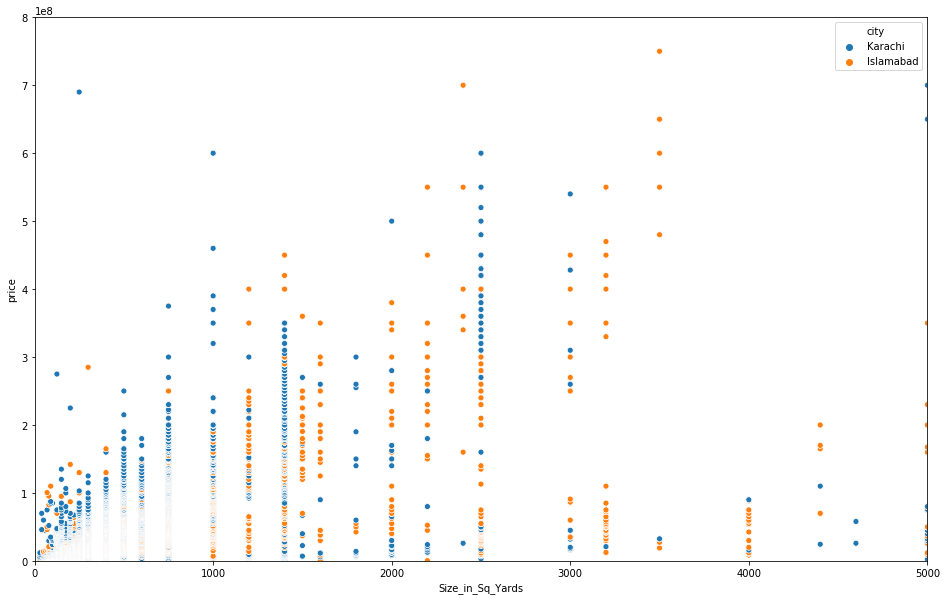

In [37]:
plt.figure(figsize=(16, 10))
plt.xlim(0, 5000)
plt.ylim(0, 800000000)
ax_scatterr = sns.scatterplot(x = data_K_ISB_sale['Size_in_Sq_Yards'], y = data_K_ISB_sale['price'], legend = 'full', hue = data_K_ISB_sale['city'])

The scatterplot of Size and Price variables above do not show a clear picture of the landscape. 
We therefore opt for other visualization methods to segment our data and classify based on other parameters such as property type, city and type of listing.

### Boxen Plot:

In [41]:
data_K_ISB_sale['norm_p'] = (data_K_ISB_sale['price']/1000)
data_K_ISB_sale.head()

,property_type,price,location,city,latitude,longitude,purpose,Size_in_Sq_Yards,norm_p
0,Upper Portion,110000.0,DHA Defence,Karachi,24.794215,67.064610,For Sale,750.0,110.0
1,Upper Portion,130000.0,DHA Defence,Karachi,24.821639,67.071691,For Sale,750.0,130.0
2,Flat,135000.0,Clifton,Karachi,24.813927,67.012610,For Sale,240.0,135.0
3,Lower Portion,150000.0,DHA Defence,Karachi,24.810265,67.043552,For Sale,750.0,150.0
4,House,150000.0,G-13,Islamabad,33.650065,72.963681,For Sale,400.0,150.0


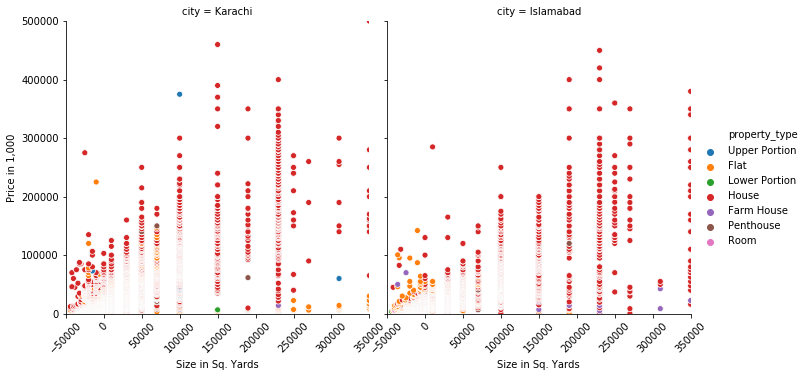

In [47]:
ax_rel = sns.relplot(x="Size_in_Sq_Yards", y="norm_p",
                 col="city", hue="property_type",
                 kind="scatter", data=data_K_ISB_sale)

ax_rel.set(xlim=(0, 2000), ylim=(0, 500000), xlabel = "Size in Sq. Yards", ylabel = "Price in 1,000")
ax_rel.set_xticklabels(rotation=45);

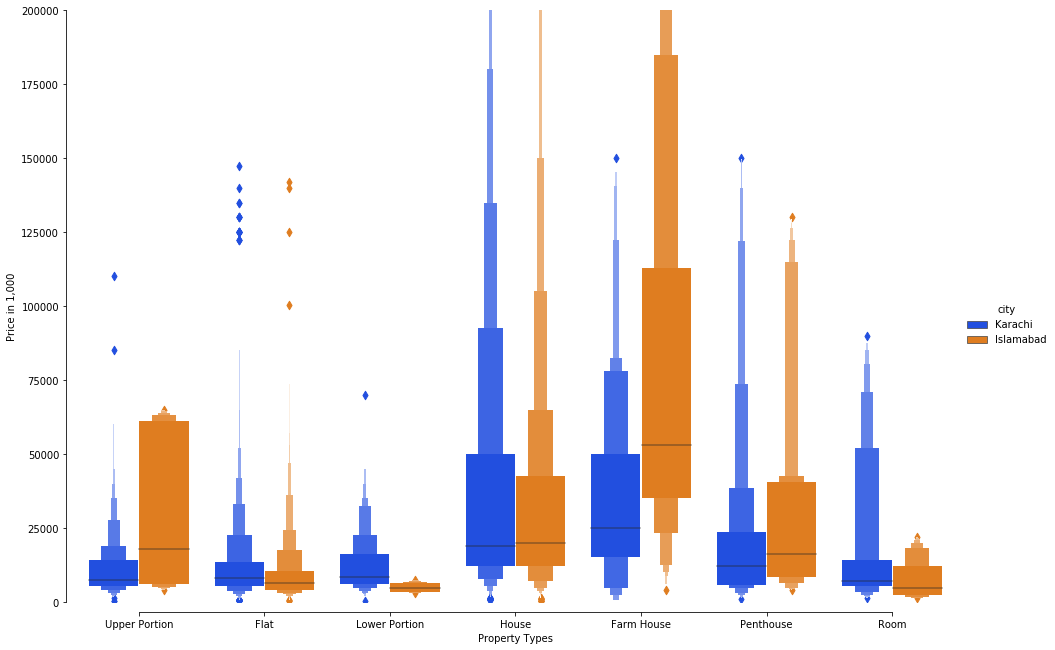

In [54]:
ax_catp_sale = sns.catplot(
    data=data_K_ISB_sale,
    x="property_type",
    y="norm_p",
    hue = "city",
    kind='boxen',
    height=9, 
    aspect=1.5,
    palette="bright")

ax_catp_sale.set(ylim=(0, 200000), xlabel = "Property Types", ylabel = "Price in 1,000")
sns.despine(offset=10, trim=True);

Above Boxplot shows a much refined picture of property prices in Karachi and Islamabad.
This plot shows a comparison on bases of type of property listed in the two cities and is available for sale.
From above plot we can observe the following:
* Islamabad has higher property listing for "Farm House", "Penthouse" and "Upper Portion" categories
* Karachi has higher property listing for "House", "Lower Portion" and "Room Category"
* Plot does not differentiates between property size
* Plot does not show number of listings in each property type

We will now further explore each of the property type separately, using Foursquare API. 
For each of the listings in their respective categories, Foursquare API will give us the neighboring data. This data will be used for clustering and segmentation. Now lets move towards initialization of Foursquare API.

### Getting Credentials for requests on API

In [55]:
CLIENT_ID = '0TBHOPQ5MAGXVJ2ONXUEDNPORUV2PCZ0UXO0LFDXT44U42YI' 
CLIENT_SECRET = 'KNPLEKZX420OQDB3I2YGQOYAGI4MO3QIP1IUH55OFJCQVUBN'
VERSION = '20180605'

print('Credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Credentails:
CLIENT_ID: 0TBHOPQ5MAGXVJ2ONXUEDNPORUV2PCZ0UXO0LFDXT44U42YI
CLIENT_SECRET:KNPLEKZX420OQDB3I2YGQOYAGI4MO3QIP1IUH55OFJCQVUBN


### Getting Coordinates for Karachi City

In [66]:
# Geopy sometimes times out so we try and print error in case it does not fetch coordinates
from geopy.exc import GeocoderTimedOut

my_address = 'Karachi'

geolocator = Nominatim()
try:
    location_k = geolocator.geocode(my_address)
    latitude_k = location_k.latitude
    longitude_k = location_k.longitude
    print('The geograpical coordinate of Karachi, Sindh are {}, {}.'.format(latitude_k, longitude_k))
except GeocoderTimedOut as e:
    print("Error: geocode failed on input %s "%(my_address))

C:\Users\Eiwan 2019\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


The geograpical coordinate of Karachi, Sindh are 25.1446897, 67.1847767315734.


In [67]:
data_K_sale = data_K_ISB_sale.loc[data_K_ISB_sale['city'] == 'Karachi']
data_K_sale = data_K_sale.reset_index(drop = True)
data_K_sale.head()

,property_type,price,location,city,latitude,longitude,purpose,Size_in_Sq_Yards,norm_p
0,Upper Portion,110000.0,DHA Defence,Karachi,24.794215,67.064610,For Sale,750.0,110.0
1,Upper Portion,130000.0,DHA Defence,Karachi,24.821639,67.071691,For Sale,750.0,130.0
2,Flat,135000.0,Clifton,Karachi,24.813927,67.012610,For Sale,240.0,135.0
3,Lower Portion,150000.0,DHA Defence,Karachi,24.810265,67.043552,For Sale,750.0,150.0
4,Flat,300000.0,Bahria Town Karachi,Karachi,24.894076,67.027715,For Sale,150.0,300.0


In [68]:
data_K_sale.drop_duplicates(subset ="location", 
                     keep = False, inplace = True)
data_K_sale.sort_values(by = ['location'], inplace = True)
data_K_sale = data_K_sale.reset_index(drop = True)
data_K_sale[['location','longitude','latitude']]

,location,longitude,latitude
0,Altaf Hussain Road,66.961912,24.919284
1,Dhabeji,67.521236,24.789435
2,Erum Villas,67.076658,24.896713
3,Gadap Road,67.253365,25.053956
4,Gobal Town,67.088202,24.966257
5,Goth Ibrahim Haidri,67.144605,24.792572
6,Gulshan-e-Ghazian,67.135509,24.996614
7,Gulshan-e-Jami,67.199470,24.911917
8,Hoshang Road,67.031274,24.843565
9,Humaira Town,67.200003,24.910078


### Creating map of Karachi with Folium, using coordinates in our dataframe for each listing

In [69]:
# create map of Karachi using latitude and longitude values
map_karachi = folium.Map(location=[latitude_k, longitude_k], zoom_start=10)
# add markers to map
for lat, lng, neighborhood in zip(data_K_sale['latitude'], data_K_sale['longitude'], data_K_sale['location']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_karachi)
    
map_karachi

### Getting Coordinates for Islamabad City

In [108]:
# Geopy sometimes times out so we try and print error in case it does not fetch coordinates
from geopy.exc import GeocoderTimedOut

my_address = 'Islamabad, Pakistan'

geolocator = Nominatim()
try:
    location_isb = geolocator.geocode(my_address)
    latitude_isb = location_isb.latitude
    longitude_isb = location_isb.longitude
    print('The geograpical coordinate of Islamabad Capital Territory are {}, {}.'.format(latitude_isb, longitude_isb))
except GeocoderTimedOut as e:
    print("Error: geocode failed on input %s "%(my_address))

C:\Users\Eiwan 2019\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


The geograpical coordinate of Islamabad Capital Territory are 33.6938118, 73.0651511.


In [109]:
data_ISB_sale = data_K_ISB_sale.loc[data_K_ISB_sale['city'] == 'Islamabad']
data_ISB_sale = data_ISB_sale.reset_index(drop = True)
data_ISB_sale.head()

,property_type,price,location,city,latitude,longitude,purpose,Size_in_Sq_Yards,norm_p
0,House,150000.0,G-13,Islamabad,33.650065,72.963681,For Sale,400.0,150.0
1,House,250000.0,G-14,Islamabad,33.638228,72.953341,For Sale,1000.0,250.0
2,House,300000.0,Abdullah Garden,Islamabad,33.634774,72.984152,For Sale,1600.0,300.0
3,Flat,375000.0,Gulberg,Islamabad,33.606327,73.159833,For Sale,70.0,375.0
4,Flat,400000.0,Multi Residencia & Orchards,Islamabad,33.718343,72.712998,For Sale,150.0,400.0


In [110]:
data_ISB_sale.drop_duplicates(subset ="location", 
                     keep = False, inplace = True)
data_ISB_sale.sort_values(by = ['location'], inplace = True)
data_ISB_sale = data_ISB_sale.reset_index(drop = True)
data_ISB_sale[['location','longitude','latitude']]

,location,longitude,latitude
0,12th Avenue,72.996002,33.624151
1,Agro Farming Scheme,73.236661,33.762376
2,Ahmed Town,72.831454,33.531531
3,Airline Avenue,72.855749,33.594532
4,Aiza Garden,73.150396,33.550364
5,Al Qaim Town,73.112588,33.646824
6,Alhamra Avenue,73.257129,33.624947
7,Atomic Energy Employee Society,73.201904,33.480422
8,Bokra Road,73.000788,33.628883
9,C-19,72.813134,33.658424


### Creating map of Islamabad with Folium, using coordinates in our dataframe for each listing

In [111]:
# create map of Islamabad using latitude and longitude values
map_islamabad = folium.Map(location=[latitude_isb, longitude_isb], zoom_start=10)
# add markers to map
for lat, lng, neighborhood in zip(data_ISB_sale['latitude'], data_ISB_sale['longitude'], data_ISB_sale['location']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_islamabad)
    
map_islamabad

### Segmentation of Locations

In [112]:
LIMIT = 100
def getNearbyVenues(names, latitudes, longitudes, radius=1500):
    
    venues_list=[]

    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Location', 
                  'Location Latitude', 
                  'Location Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [113]:
karachi_venues = getNearbyVenues(names=data_K_sale['location'],
                                   latitudes=data_K_sale['latitude'],
                                   longitudes=data_K_sale['longitude']
                                  )

karachi_venues

,Location,Location Latitude,Location Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Erum Villas,24.896713,67.076658,Aga Khan Sports & Rehabilitation Center,24.892157,67.079419,Gym / Fitness Center
1,Erum Villas,24.896713,67.076658,Shazz Supermarket,24.897260,67.079086,Supermarket
2,Erum Villas,24.896713,67.076658,Burger Inc,24.897225,67.078910,Burger Joint
3,Erum Villas,24.896713,67.076658,Dunkin',24.904756,67.078900,Donut Shop
4,Erum Villas,24.896713,67.076658,McDonald's,24.891543,67.081012,Fast Food Restaurant
5,Erum Villas,24.896713,67.076658,Karachi Arts Council Auditorium,24.895419,67.062449,Theater
6,Erum Villas,24.896713,67.076658,Time Medico,24.891613,67.081410,Pharmacy
7,Erum Villas,24.896713,67.076658,Dhoraji,24.886860,67.078629,Night Market
8,Erum Villas,24.896713,67.076658,National Coaching Center,24.894638,67.079054,Athletics & Sports
9,Erum Villas,24.896713,67.076658,Usmania Restaurant,24.904386,67.077488,Pakistani Restaurant


In [114]:
islamabad_venues = getNearbyVenues(names=data_ISB_sale['location'],
                                   latitudes=data_ISB_sale['latitude'],
                                   longitudes=data_ISB_sale['longitude']
                                  )

islamabad_venues

,Location,Location Latitude,Location Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,12th Avenue,33.624151,72.996002,Long Munir Legal service,33.630000,72.998503,Lawyer
1,12th Avenue,33.624151,72.996002,Kainaat Travels,33.614996,72.998674,Bus Station
2,12th Avenue,33.624151,72.996002,Ghosia,33.614955,72.993000,Bus Station
3,12th Avenue,33.624151,72.996002,Bilal Travels,33.613581,72.996500,Bus Station
4,12th Avenue,33.624151,72.996002,Lahori Tikka Point,33.614151,73.005882,BBQ Joint
5,Agro Farming Scheme,33.762376,73.236661,Chattar Park,33.769464,73.224375,Park
6,Airline Avenue,33.594532,72.855749,Islamabad Toll Plaza,33.597458,72.865222,Toll Plaza
7,Aiza Garden,33.550364,73.150396,Shaheen Chemist,33.552381,73.139193,Pharmacy
8,Aiza Garden,33.550364,73.150396,Tutti Fruti Bahria Town Islamabad,33.552628,73.139542,Ice Cream Shop
9,Aiza Garden,33.550364,73.150396,Cafe Da Joint,33.552136,73.138853,Café


In [115]:
k_group = karachi_venues.groupby('Location').count()
k_group['Venue']

Location
Erum Villas                21
Gobal Town                  2
Goth Ibrahim Haidri         2
Gulshan-e-Ghazian           3
Gulshan-e-Jami              3
Hoshang Road               53
Humaira Town                3
Jamaluddin Afghani Road    63
Mauripur Road               4
Old Clifton                70
Old Queens Road            12
Peoples Colony             23
Royal Defence Tower        14
Shahra-e-Jahangir          16
Shahra-e-Liaquat           42
Name: Venue, dtype: int64

In [116]:
isb_group = islamabad_venues.groupby('Location').count()
isb_group['Venue']

Location
12th Avenue             5
Agro Farming Scheme     1
Airline Avenue          1
Aiza Garden             5
Al Qaim Town            4
Bokra Road              4
Club Road              26
F-9                    26
Jagiot Road             3
Karakoram Enclave 1    20
Korang Road             6
Lawyers Society         8
PTV Colony              8
Sihala                  2
Sihala Valley           1
Name: Venue, dtype: int64

In [117]:
print('There are {} unique categories in Karachi and {} unique categories in Islamabad.'.format(len(karachi_venues['Venue Category'].unique()),len(islamabad_venues['Venue Category'].unique())))

There are 82 unique categories in Karachi and 54 unique categories in Islamabad.


## Analyzing Each Location

### One-Hot Encoding

In [118]:
# Initializing a new dataframe for one-hot encoding, for each city
karachi_onehot = []
islamabad_onehot = []
karachi_onehot = pd.DataFrame(karachi_onehot)
islamabad_onehot = pd.DataFrame(islamabad_onehot)

# Adding Location column to the new dataframes
karachi_onehot['Location'] = karachi_venues['Location']
islamabad_onehot['Location'] = islamabad_venues['Location']

# One-hot encoding
karachi_dummies = pd.get_dummies(karachi_venues[['Venue Category']], prefix="", prefix_sep="")
islamabad_dummies = pd.get_dummies(islamabad_venues[['Venue Category']], prefix="", prefix_sep="")
karachi_onehot = pd.concat([karachi_onehot, karachi_dummies], axis=1, sort=False)
islamabad_onehot = pd.concat([islamabad_onehot, islamabad_dummies], axis=1, sort=False)
karachi_onehot

,Location,American Restaurant,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Beach,Bistro,Bookstore,Bowling Alley,...,Sports Club,Steakhouse,Street Food Gathering,Supermarket,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Train Station
0,Erum Villas,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Erum Villas,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Erum Villas,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Erum Villas,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Erum Villas,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Erum Villas,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,Erum Villas,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Erum Villas,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Erum Villas,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Erum Villas,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
islamabad_onehot

,Location,Asian Restaurant,BBQ Joint,Bakery,Big Box Store,Bowling Alley,Bus Station,Café,Coffee Shop,Deli / Bodega,...,Restaurant,Sandwich Place,Snack Place,Steakhouse,Supermarket,Tea Room,Tibetan Restaurant,Toll Plaza,Wings Joint,Zoo
0,12th Avenue,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12th Avenue,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12th Avenue,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12th Avenue,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12th Avenue,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Agro Farming Scheme,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Airline Avenue,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,Aiza Garden,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Aiza Garden,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Aiza Garden,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
# Grouping Locations in Karachi
karachi_grouped = karachi_onehot.groupby('Location').mean().reset_index()
karachi_grouped

,Location,American Restaurant,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Beach,Bistro,Bookstore,Bowling Alley,...,Sports Club,Steakhouse,Street Food Gathering,Supermarket,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Train Station
0,Erum Villas,0.000000,0.047619,0.047619,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.047619,0.000000,0.000000,0.047619,0.000000,0.047619,0.000000
1,Gobal Town,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Goth Ibrahim Haidri,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Gulshan-e-Ghazian,0.000000,0.000000,0.000000,0.333333,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Gulshan-e-Jami,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Hoshang Road,0.018868,0.075472,0.000000,0.018868,0.018868,0.00000,0.018868,0.000000,0.000000,...,0.0,0.018868,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018868,0.018868
6,Humaira Town,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Jamaluddin Afghani Road,0.015873,0.015873,0.015873,0.063492,0.015873,0.00000,0.000000,0.000000,0.015873,...,0.0,0.015873,0.000000,0.000000,0.000000,0.015873,0.015873,0.000000,0.015873,0.000000
8,Mauripur Road,0.000000,0.250000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Old Clifton,0.014286,0.014286,0.000000,0.057143,0.042857,0.00000,0.000000,0.014286,0.000000,...,0.0,0.014286,0.014286,0.028571,0.014286,0.000000,0.000000,0.014286,0.000000,0.000000


In [121]:
# Grouping Locations in Islamabad
islamabad_grouped = islamabad_onehot.groupby('Location').mean().reset_index()
islamabad_grouped

,Location,Asian Restaurant,BBQ Joint,Bakery,Big Box Store,Bowling Alley,Bus Station,Café,Coffee Shop,Deli / Bodega,...,Restaurant,Sandwich Place,Snack Place,Steakhouse,Supermarket,Tea Room,Tibetan Restaurant,Toll Plaza,Wings Joint,Zoo
0,12th Avenue,0.000000,0.200000,0.000000,0.000000,0.000000,0.6,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000,0.000000,0.000,0.0,0.00,0.000000
1,Agro Farming Scheme,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000,0.000000,0.000,0.0,0.00,0.000000
2,Airline Avenue,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000,0.000000,0.000,1.0,0.00,0.000000
3,Aiza Garden,0.000000,0.200000,0.000000,0.000000,0.000000,0.0,0.200000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000,0.000000,0.000,0.0,0.00,0.000000
4,Al Qaim Town,0.250000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.250000,0.000000,0.00,0.000000,0.000,0.000000,0.000,0.0,0.00,0.000000
5,Bokra Road,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000,0.000000,0.000,0.0,0.00,0.000000
6,Club Road,0.038462,0.000000,0.038462,0.000000,0.000000,0.0,0.076923,0.038462,0.038462,...,0.076923,0.000000,0.00,0.038462,0.000,0.000000,0.000,0.0,0.00,0.000000
7,F-9,0.000000,0.038462,0.076923,0.000000,0.038462,0.0,0.076923,0.038462,0.000000,...,0.038462,0.038462,0.00,0.000000,0.000,0.038462,0.000,0.0,0.00,0.000000
8,Jagiot Road,0.333333,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000,0.000000,0.000,0.0,0.00,0.333333
9,Karakoram Enclave 1,0.000000,0.000000,0.100000,0.000000,0.000000,0.0,0.250000,0.100000,0.000000,...,0.000000,0.050000,0.05,0.000000,0.000,0.050000,0.000,0.0,0.05,0.000000


In [122]:
# Function will return most common occurances of venues in each Location
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [123]:
# Sorting and displaying top 10 venues per each Location

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Location']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
k_location_venues_sorted = pd.DataFrame(columns = columns)
k_location_venues_sorted['Location'] = karachi_grouped['Location']

isb_location_venues_sorted = pd.DataFrame(columns = columns)
isb_location_venues_sorted['Location'] = islamabad_grouped['Location']

for ind in np.arange(karachi_grouped.shape[0]):
    k_location_venues_sorted.iloc[ind, 1:] = return_most_common_venues(karachi_grouped.iloc[ind, :], num_top_venues)

for ind in np.arange(islamabad_grouped.shape[0]):
    isb_location_venues_sorted.iloc[ind, 1:] = return_most_common_venues(islamabad_grouped.iloc[ind, :], num_top_venues)

k_location_venues_sorted

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Erum Villas,Pharmacy,Fast Food Restaurant,Burger Joint,Pakistani Restaurant,Night Market,Department Store,Cricket Ground,Dessert Shop,Gym / Fitness Center,Pizza Place
1,Gobal Town,Breakfast Spot,Pharmacy,Historic Site,Fish & Chips Shop,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,English Restaurant
2,Goth Ibrahim Haidri,Pier,Sports Club,Food & Drink Shop,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,English Restaurant,Fast Food Restaurant
3,Gulshan-e-Ghazian,Restaurant,BBQ Joint,Train Station,Food & Drink Shop,Dessert Shop,Diner,Donut Shop,Electronics Store,English Restaurant,Fast Food Restaurant
4,Gulshan-e-Jami,Hotel,Café,Pizza Place,Athletics & Sports,Food & Drink Shop,Dessert Shop,Diner,Donut Shop,Electronics Store,English Restaurant
5,Hoshang Road,Hotel,Asian Restaurant,Fast Food Restaurant,Café,Performing Arts Venue,Japanese Restaurant,Italian Restaurant,Gym,Shopping Mall,Social Club
6,Humaira Town,Hotel,Café,Cricket Ground,Athletics & Sports,Food Court,Diner,Donut Shop,Electronics Store,English Restaurant,Fast Food Restaurant
7,Jamaluddin Afghani Road,Fast Food Restaurant,Pizza Place,Burger Joint,Department Store,BBQ Joint,Ice Cream Shop,Pakistani Restaurant,Chinese Restaurant,Dessert Shop,Market
8,Mauripur Road,Soccer Field,Asian Restaurant,Coffee Shop,Restaurant,Train Station,Dessert Shop,Diner,Donut Shop,Electronics Store,English Restaurant
9,Old Clifton,Dessert Shop,Café,Fast Food Restaurant,Burger Joint,Clothing Store,BBQ Joint,Bakery,Coffee Shop,Ice Cream Shop,Pizza Place


In [124]:
isb_location_venues_sorted

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,12th Avenue,Bus Station,BBQ Joint,Lawyer,Zoo,Fast Food Restaurant,Hotel,Home Service,Gym / Fitness Center,Gym,Golf Course
1,Agro Farming Scheme,Park,Zoo,Hotel,Home Service,Gym / Fitness Center,Gym,Golf Course,Garden,Food Truck,Fish & Chips Shop
2,Airline Avenue,Toll Plaza,Zoo,Falafel Restaurant,Hotel,Home Service,Gym / Fitness Center,Gym,Golf Course,Garden,Food Truck
3,Aiza Garden,Pharmacy,BBQ Joint,Café,Donut Shop,Ice Cream Shop,Fast Food Restaurant,Hotel,Home Service,Gym / Fitness Center,Gym
4,Al Qaim Town,Asian Restaurant,Hotel,Lake,Restaurant,Farm,Home Service,Gym / Fitness Center,Gym,Golf Course,Garden
5,Bokra Road,Lawyer,Home Service,Mobile Phone Shop,Zoo,Ice Cream Shop,Hotel,Gym / Fitness Center,Gym,Golf Course,Garden
6,Club Road,Hotel,Gym,Golf Course,Café,Restaurant,Coffee Shop,Film Studio,Lounge,Middle Eastern Restaurant,Movie Theater
7,F-9,Park,Pizza Place,Café,Fast Food Restaurant,Bakery,Tea Room,Pakistani Restaurant,Italian Restaurant,Falafel Restaurant,Donut Shop
8,Jagiot Road,Zoo,Café,Asian Restaurant,Tibetan Restaurant,Falafel Restaurant,Home Service,Gym / Fitness Center,Gym,Golf Course,Garden
9,Karakoram Enclave 1,Café,Ice Cream Shop,Bakery,Coffee Shop,Pakistani Restaurant,Wings Joint,Gym,Diner,Pharmacy,Gym / Fitness Center


### Clustering Neighborhoods using K - Means

In [196]:
# set number of clusters
kclusters = 6

karachi_grouped_clustering = karachi_grouped.drop('Location', 1)
islamabad_grouped_clustering = islamabad_grouped.drop('Location', 1)

# run k-means clustering
k_kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(karachi_grouped_clustering)
isb_kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(islamabad_grouped_clustering)

# check cluster labels generated for each row in the dataframe
k_kmeans.labels_[0:10]

array([2, 5, 3, 4, 0, 2, 0, 2, 1, 2])

In [197]:
isb_kmeans.labels_[0:10]

array([5, 3, 0, 2, 2, 1, 2, 2, 2, 2])

### Adding dataframes together: Karachi & Islamabad cities main data and Common Venues in respective Locations

In [128]:
# add clustering labels
k_location_venues_sorted.insert(0, 'Cluster Labels', k_kmeans.labels_)
isb_location_venues_sorted.insert(0, 'Cluster Labels', isb_kmeans.labels_)

karachi_merged = data_K_sale
islamabad_merged = data_ISB_sale

# merge karachi_grouped & islamabd_grouped with data_K_sale & data_ISB_sale to add latitude/longitude for each neighborhood
karachi_merged = karachi_merged.join(k_location_venues_sorted.set_index('Location'), on='location')
islamabad_merged = islamabad_merged.join(isb_location_venues_sorted.set_index('Location'), on='location')

karachi_merged.head() 

,property_type,price,location,city,latitude,longitude,purpose,Size_in_Sq_Yards,norm_p,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,House,7000000.0,Altaf Hussain Road,Karachi,24.919284,66.961912,For Sale,100.0,7000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Farm House,25000000.0,Dhabeji,Karachi,24.789435,67.521236,For Sale,6200.0,25000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Flat,5000000.0,Erum Villas,Karachi,24.896713,67.076658,For Sale,175.0,5000.0,2.0,Pharmacy,Fast Food Restaurant,Burger Joint,Pakistani Restaurant,Night Market,Department Store,Cricket Ground,Dessert Shop,Gym / Fitness Center,Pizza Place
3,Flat,4500000.0,Gadap Road,Karachi,25.053956,67.253365,For Sale,200.0,4500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Flat,6500000.0,Gobal Town,Karachi,24.966257,67.088202,For Sale,220.0,6500.0,5.0,Breakfast Spot,Pharmacy,Historic Site,Fish & Chips Shop,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,English Restaurant


In [129]:
karachi_merged.dropna(subset = ['Cluster Labels'], inplace = True)
karachi_merged.reset_index(drop = True)

,property_type,price,location,city,latitude,longitude,purpose,Size_in_Sq_Yards,norm_p,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Flat,5000000.0,Erum Villas,Karachi,24.896713,67.076658,For Sale,175.0,5000.0,2.0,Pharmacy,Fast Food Restaurant,Burger Joint,Pakistani Restaurant,Night Market,Department Store,Cricket Ground,Dessert Shop,Gym / Fitness Center,Pizza Place
1,Flat,6500000.0,Gobal Town,Karachi,24.966257,67.088202,For Sale,220.0,6500.0,5.0,Breakfast Spot,Pharmacy,Historic Site,Fish & Chips Shop,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,English Restaurant
2,Flat,12000000.0,Goth Ibrahim Haidri,Karachi,24.792572,67.144605,For Sale,175.0,12000.0,3.0,Pier,Sports Club,Food & Drink Shop,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,English Restaurant,Fast Food Restaurant
3,Flat,4000000.0,Gulshan-e-Ghazian,Karachi,24.996614,67.135509,For Sale,150.0,4000.0,4.0,Restaurant,BBQ Joint,Train Station,Food & Drink Shop,Dessert Shop,Diner,Donut Shop,Electronics Store,English Restaurant,Fast Food Restaurant
4,House,20000000.0,Gulshan-e-Jami,Karachi,24.911917,67.199470,For Sale,200.0,20000.0,0.0,Hotel,Café,Pizza Place,Athletics & Sports,Food & Drink Shop,Dessert Shop,Diner,Donut Shop,Electronics Store,English Restaurant
5,Flat,17000000.0,Hoshang Road,Karachi,24.843565,67.031274,For Sale,120.0,17000.0,2.0,Hotel,Asian Restaurant,Fast Food Restaurant,Café,Performing Arts Venue,Japanese Restaurant,Italian Restaurant,Gym,Shopping Mall,Social Club
6,House,9500000.0,Humaira Town,Karachi,24.910078,67.200003,For Sale,175.0,9500.0,0.0,Hotel,Café,Cricket Ground,Athletics & Sports,Food Court,Diner,Donut Shop,Electronics Store,English Restaurant,Fast Food Restaurant
7,Flat,15000000.0,Jamaluddin Afghani Road,Karachi,24.884039,67.064471,For Sale,220.0,15000.0,2.0,Fast Food Restaurant,Pizza Place,Burger Joint,Department Store,BBQ Joint,Ice Cream Shop,Pakistani Restaurant,Chinese Restaurant,Dessert Shop,Market
8,House,3500000.0,Mauripur Road,Karachi,24.863855,66.986321,For Sale,200.0,3500.0,1.0,Soccer Field,Asian Restaurant,Coffee Shop,Restaurant,Train Station,Dessert Shop,Diner,Donut Shop,Electronics Store,English Restaurant
9,House,110000000.0,Old Clifton,Karachi,24.817883,67.032915,For Sale,750.0,110000.0,2.0,Dessert Shop,Café,Fast Food Restaurant,Burger Joint,Clothing Store,BBQ Joint,Bakery,Coffee Shop,Ice Cream Shop,Pizza Place


In [130]:
islamabad_merged.dropna(subset = ['Cluster Labels'], inplace = True)
islamabad_merged.reset_index(drop = True)

,property_type,price,location,city,latitude,longitude,purpose,Size_in_Sq_Yards,norm_p,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Flat,30000000.0,12th Avenue,Islamabad,33.624151,72.996002,For Sale,300.0,30000.0,5.0,Bus Station,BBQ Joint,Lawyer,Zoo,Fast Food Restaurant,Hotel,Home Service,Gym / Fitness Center,Gym,Golf Course
1,Farm House,95000000.0,Agro Farming Scheme,Islamabad,33.762376,73.236661,For Sale,9800.0,95000.0,3.0,Park,Zoo,Hotel,Home Service,Gym / Fitness Center,Gym,Golf Course,Garden,Food Truck,Fish & Chips Shop
2,House,13500000.0,Airline Avenue,Islamabad,33.594532,72.855749,For Sale,175.0,13500.0,0.0,Toll Plaza,Zoo,Falafel Restaurant,Hotel,Home Service,Gym / Fitness Center,Gym,Golf Course,Garden,Food Truck
3,House,8500000.0,Aiza Garden,Islamabad,33.550364,73.150396,For Sale,400.0,8500.0,2.0,Pharmacy,BBQ Joint,Café,Donut Shop,Ice Cream Shop,Fast Food Restaurant,Hotel,Home Service,Gym / Fitness Center,Gym
4,House,4800000.0,Al Qaim Town,Islamabad,33.646824,73.112588,For Sale,220.0,4800.0,2.0,Asian Restaurant,Hotel,Lake,Restaurant,Farm,Home Service,Gym / Fitness Center,Gym,Golf Course,Garden
5,House,13000000.0,Bokra Road,Islamabad,33.628883,73.000788,For Sale,220.0,13000.0,1.0,Lawyer,Home Service,Mobile Phone Shop,Zoo,Ice Cream Shop,Hotel,Gym / Fitness Center,Gym,Golf Course,Garden
6,Farm House,800000000.0,Club Road,Islamabad,33.711489,73.103435,For Sale,12500.0,800000.0,2.0,Hotel,Gym,Golf Course,Café,Restaurant,Coffee Shop,Film Studio,Lounge,Middle Eastern Restaurant,Movie Theater
7,Flat,50000000.0,F-9,Islamabad,33.701493,73.022861,For Sale,300.0,50000.0,2.0,Park,Pizza Place,Café,Fast Food Restaurant,Bakery,Tea Room,Pakistani Restaurant,Italian Restaurant,Falafel Restaurant,Donut Shop
8,House,3100000.0,Jagiot Road,Islamabad,33.676393,73.214595,For Sale,100.0,3100.0,2.0,Zoo,Café,Asian Restaurant,Tibetan Restaurant,Falafel Restaurant,Home Service,Gym / Fitness Center,Gym,Golf Course,Garden
9,Flat,55000000.0,Karakoram Enclave 1,Islamabad,33.681755,72.985775,For Sale,220.0,55000.0,2.0,Café,Ice Cream Shop,Bakery,Coffee Shop,Pakistani Restaurant,Wings Joint,Gym,Diner,Pharmacy,Gym / Fitness Center


In [131]:
karachi_merged.rename(columns={'Cluster Labels':'Cluster_Labels'}, inplace=True)
islamabad_merged.rename(columns={'Cluster Labels':'Cluster_Labels'}, inplace=True)

In [132]:
karachi_merged.Cluster_Labels = karachi_merged.Cluster_Labels.astype('int64') 
islamabad_merged.Cluster_Labels = islamabad_merged.Cluster_Labels.astype('int64') 

### Creating a map of Clustered data

### Karachi City

In [133]:
# create map
k_map_clusters = folium.Map(location=[latitude_k, longitude_k], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(karachi_merged['latitude'], karachi_merged['longitude'], karachi_merged['location'], karachi_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(k_map_clusters)
       
k_map_clusters

### Islamabad City

In [134]:
# create map
isb_map_clusters = folium.Map(location=[latitude_isb, longitude_isb], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(islamabad_merged['latitude'], islamabad_merged['longitude'], islamabad_merged['location'], islamabad_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(isb_map_clusters)
       
isb_map_clusters

### Clustered Data for both Karachi and Islamabad

#### Cluster # 0 for Karachi:

In [135]:
karachi_merged.loc[karachi_merged['Cluster_Labels'] == 0, karachi_merged.columns[[2] + [3] + list(range(9, karachi_merged.shape[1]))]]

,location,city,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Gulshan-e-Jami,Karachi,0,Hotel,Café,Pizza Place,Athletics & Sports,Food & Drink Shop,Dessert Shop,Diner,Donut Shop,Electronics Store,English Restaurant
9,Humaira Town,Karachi,0,Hotel,Café,Cricket Ground,Athletics & Sports,Food Court,Diner,Donut Shop,Electronics Store,English Restaurant,Fast Food Restaurant


#### Cluster # 1 for Karachi:

In [136]:
karachi_merged.loc[karachi_merged['Cluster_Labels'] == 1, karachi_merged.columns[[2] + [3] + list(range(9, karachi_merged.shape[1]))]]

,location,city,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Mauripur Road,Karachi,1,Soccer Field,Asian Restaurant,Coffee Shop,Restaurant,Train Station,Dessert Shop,Diner,Donut Shop,Electronics Store,English Restaurant


#### Cluster # 2 for Karachi:

In [137]:
karachi_merged.loc[karachi_merged['Cluster_Labels'] == 2, karachi_merged.columns[[2] + [3] + list(range(9, karachi_merged.shape[1]))]]

,location,city,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Erum Villas,Karachi,2,Pharmacy,Fast Food Restaurant,Burger Joint,Pakistani Restaurant,Night Market,Department Store,Cricket Ground,Dessert Shop,Gym / Fitness Center,Pizza Place
8,Hoshang Road,Karachi,2,Hotel,Asian Restaurant,Fast Food Restaurant,Café,Performing Arts Venue,Japanese Restaurant,Italian Restaurant,Gym,Shopping Mall,Social Club
10,Jamaluddin Afghani Road,Karachi,2,Fast Food Restaurant,Pizza Place,Burger Joint,Department Store,BBQ Joint,Ice Cream Shop,Pakistani Restaurant,Chinese Restaurant,Dessert Shop,Market
14,Old Clifton,Karachi,2,Dessert Shop,Café,Fast Food Restaurant,Burger Joint,Clothing Store,BBQ Joint,Bakery,Coffee Shop,Ice Cream Shop,Pizza Place
15,Old Queens Road,Karachi,2,Fast Food Restaurant,Hotel,Seafood Restaurant,BBQ Joint,Italian Restaurant,Pizza Place,Market,Restaurant,Chinese Restaurant,Café
16,Peoples Colony,Karachi,2,Fast Food Restaurant,Department Store,Ice Cream Shop,Bakery,Burger Joint,Bus Station,Cricket Ground,Pakistani Restaurant,Electronics Store,Pizza Place
17,Royal Defence Tower,Karachi,2,Bakery,BBQ Joint,Convenience Store,Diner,Tea Room,Pizza Place,Coffee Shop,Juice Bar,Market,Department Store
18,Shahra-e-Jahangir,Karachi,2,Bakery,Pizza Place,Indian Restaurant,Snack Place,Ice Cream Shop,Movie Theater,Restaurant,Pakistani Restaurant,Park,BBQ Joint
19,Shahra-e-Liaquat,Karachi,2,Fast Food Restaurant,Market,Café,Ice Cream Shop,Shopping Mall,Clothing Store,Hotel,Asian Restaurant,Pakistani Restaurant,Beach


#### Cluster # 3 for Karachi:

In [138]:
karachi_merged.loc[karachi_merged['Cluster_Labels'] == 3, karachi_merged.columns[[2] + [3] + list(range(9, karachi_merged.shape[1]))]]

,location,city,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Goth Ibrahim Haidri,Karachi,3,Pier,Sports Club,Food & Drink Shop,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,English Restaurant,Fast Food Restaurant


#### Cluster # 4 for Karachi:

In [140]:
karachi_merged.loc[karachi_merged['Cluster_Labels'] == 4, karachi_merged.columns[[2] + [3] + list(range(9, karachi_merged.shape[1]))]]

,location,city,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Gulshan-e-Ghazian,Karachi,4,Restaurant,BBQ Joint,Train Station,Food & Drink Shop,Dessert Shop,Diner,Donut Shop,Electronics Store,English Restaurant,Fast Food Restaurant


#### Cluster # 5 for Karachi:

In [141]:
karachi_merged.loc[karachi_merged['Cluster_Labels'] == 5, karachi_merged.columns[[2] + [3] + list(range(9, karachi_merged.shape[1]))]]

,location,city,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Gobal Town,Karachi,5,Breakfast Spot,Pharmacy,Historic Site,Fish & Chips Shop,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,English Restaurant


#### Cluster # 0 for Islamabad:

In [142]:
islamabad_merged.loc[islamabad_merged['Cluster_Labels'] == 0, islamabad_merged.columns[[2] + [3] + list(range(9, islamabad_merged.shape[1]))]]

,location,city,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Airline Avenue,Islamabad,0,Toll Plaza,Zoo,Falafel Restaurant,Hotel,Home Service,Gym / Fitness Center,Gym,Golf Course,Garden,Food Truck


#### Cluster # 1 for Islamabad:

In [143]:
islamabad_merged.loc[islamabad_merged['Cluster_Labels'] == 1, islamabad_merged.columns[[2] + [3] + list(range(9, islamabad_merged.shape[1]))]]

,location,city,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Bokra Road,Islamabad,1,Lawyer,Home Service,Mobile Phone Shop,Zoo,Ice Cream Shop,Hotel,Gym / Fitness Center,Gym,Golf Course,Garden


#### Cluster # 2 for Islamabad:

In [144]:
islamabad_merged.loc[islamabad_merged['Cluster_Labels'] == 2, islamabad_merged.columns[[2] + [3] + list(range(9, islamabad_merged.shape[1]))]]

,location,city,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Aiza Garden,Islamabad,2,Pharmacy,BBQ Joint,Café,Donut Shop,Ice Cream Shop,Fast Food Restaurant,Hotel,Home Service,Gym / Fitness Center,Gym
5,Al Qaim Town,Islamabad,2,Asian Restaurant,Hotel,Lake,Restaurant,Farm,Home Service,Gym / Fitness Center,Gym,Golf Course,Garden
11,Club Road,Islamabad,2,Hotel,Gym,Golf Course,Café,Restaurant,Coffee Shop,Film Studio,Lounge,Middle Eastern Restaurant,Movie Theater
12,F-9,Islamabad,2,Park,Pizza Place,Café,Fast Food Restaurant,Bakery,Tea Room,Pakistani Restaurant,Italian Restaurant,Falafel Restaurant,Donut Shop
14,Jagiot Road,Islamabad,2,Zoo,Café,Asian Restaurant,Tibetan Restaurant,Falafel Restaurant,Home Service,Gym / Fitness Center,Gym,Golf Course,Garden
15,Karakoram Enclave 1,Islamabad,2,Café,Ice Cream Shop,Bakery,Coffee Shop,Pakistani Restaurant,Wings Joint,Gym,Diner,Pharmacy,Gym / Fitness Center
16,Korang Road,Islamabad,2,Indian Restaurant,Bakery,Big Box Store,Café,Department Store,Market,Film Studio,Hotel,Home Service,Gym / Fitness Center
17,Lawyers Society,Islamabad,2,Asian Restaurant,Playground,Italian Restaurant,Garden,Food Truck,Pharmacy,Ice Cream Shop,Supermarket,Bus Station,Film Studio
21,PTV Colony,Islamabad,2,Fast Food Restaurant,Pakistani Restaurant,Tibetan Restaurant,IT Services,Pharmacy,Juice Bar,Farm,Department Store,Fish & Chips Shop,Film Studio


#### Cluster # 3 for Islamabad:

In [145]:
islamabad_merged.loc[islamabad_merged['Cluster_Labels'] == 3, islamabad_merged.columns[[2] + [3] + list(range(9, islamabad_merged.shape[1]))]]

,location,city,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Agro Farming Scheme,Islamabad,3,Park,Zoo,Hotel,Home Service,Gym / Fitness Center,Gym,Golf Course,Garden,Food Truck,Fish & Chips Shop


#### Cluster # 4 for Islamabad:

In [146]:
islamabad_merged.loc[islamabad_merged['Cluster_Labels'] == 4, islamabad_merged.columns[[2] + [3] + list(range(9, islamabad_merged.shape[1]))]]

,location,city,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,Sihala,Islamabad,4,Light Rail Station,Pharmacy,Zoo,Farm,Hotel,Home Service,Gym / Fitness Center,Gym,Golf Course,Garden
24,Sihala Valley,Islamabad,4,Light Rail Station,Zoo,Farm,Hotel,Home Service,Gym / Fitness Center,Gym,Golf Course,Garden,Food Truck


#### Cluster # 5 for Islamabad:

In [147]:
islamabad_merged.loc[islamabad_merged['Cluster_Labels'] == 5, islamabad_merged.columns[[2] + [3] + list(range(9, islamabad_merged.shape[1]))]]

,location,city,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,12th Avenue,Islamabad,5,Bus Station,BBQ Joint,Lawyer,Zoo,Fast Food Restaurant,Hotel,Home Service,Gym / Fitness Center,Gym,Golf Course


From the clustered data, for both Karachi and Islamabad, we observe the following:

* Most common venues in majority of localities in Karachi are Fast Food Chains and Restaurants.
* Islamabad's cluster labelled #2 is more similar to Karachi in terms of Fast Food Chains than other clusters.
* Islamabad's clusters are diverse in terms of venues as they have Pharmacies, Hotels, IT shops and Fitness Centres in all of the clusters.
* Karachi's cluster #1 and #3 are differentiated only by top 2 venues in their respective localities.
* Islamabad's clusters #3 and #4 are also similar, however differentiated by frequencies of common venues.

Above clustering gives a more improved perspective of the kind of cities these two are, however this information is still not enough to make a call on purchasing property. 
Customers and investors come from varying backgrounds and with that their taste, preferences and buying power varies as well. In order to entertain such diversity, we need to first compare all the localities together so that differences and similarities between both cities can be better visualized.
After that, we need to separately segment localities and properties based on the type of property is in the listing. 
As we observed in our Boxplot, there are significant difference between the two cities based on property types they offer, however that comparison was limited to Price variable only. We will go further and evaluate all the property types separately and see which localities are best for their respective type of property types.

## Inter-City Clustering

In [148]:
# Recall that our we had previously acquired venue data for localities in both cities in two dataframe
# We combined both dataframes together

dummy_var = [karachi_venues, islamabad_venues]
combined_venues = pd.concat(dummy_var)
combined_venues

,Location,Location Latitude,Location Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Erum Villas,24.896713,67.076658,Aga Khan Sports & Rehabilitation Center,24.892157,67.079419,Gym / Fitness Center
1,Erum Villas,24.896713,67.076658,Shazz Supermarket,24.897260,67.079086,Supermarket
2,Erum Villas,24.896713,67.076658,Burger Inc,24.897225,67.078910,Burger Joint
3,Erum Villas,24.896713,67.076658,Dunkin',24.904756,67.078900,Donut Shop
4,Erum Villas,24.896713,67.076658,McDonald's,24.891543,67.081012,Fast Food Restaurant
5,Erum Villas,24.896713,67.076658,Karachi Arts Council Auditorium,24.895419,67.062449,Theater
6,Erum Villas,24.896713,67.076658,Time Medico,24.891613,67.081410,Pharmacy
7,Erum Villas,24.896713,67.076658,Dhoraji,24.886860,67.078629,Night Market
8,Erum Villas,24.896713,67.076658,National Coaching Center,24.894638,67.079054,Athletics & Sports
9,Erum Villas,24.896713,67.076658,Usmania Restaurant,24.904386,67.077488,Pakistani Restaurant


In [149]:
combined_group = combined_venues.groupby('Location').count()
combined_group['Venue']

Location
12th Avenue                 5
Agro Farming Scheme         1
Airline Avenue              1
Aiza Garden                 5
Al Qaim Town                4
Bokra Road                  4
Club Road                  26
Erum Villas                21
F-9                        26
Gobal Town                  2
Goth Ibrahim Haidri         2
Gulshan-e-Ghazian           3
Gulshan-e-Jami              3
Hoshang Road               53
Humaira Town                3
Jagiot Road                 3
Jamaluddin Afghani Road    63
Karakoram Enclave 1        20
Korang Road                 6
Lawyers Society             8
Mauripur Road               4
Old Clifton                70
Old Queens Road            12
PTV Colony                  8
Peoples Colony             23
Royal Defence Tower        14
Shahra-e-Jahangir          16
Shahra-e-Liaquat           42
Sihala                      2
Sihala Valley               1
Name: Venue, dtype: int64

In [150]:
print('There are {} unique categories in Karachi and Islamabad combined.'.format(len(combined_venues['Venue Category'].unique())))

There are 102 unique categories in Karachi and Islamabad combined.


In [186]:
# Initializing a new dataframe for one-hot encoding
combined_onehot = []
combined_onehot = pd.DataFrame(combined_onehot)

# Adding Location column to the new dataframe
combined_onehot['Location'] = combined_venues['Location']

# One-hot encoding
combined_dummies = pd.get_dummies(combined_venues[['Venue Category']], prefix="", prefix_sep="")
combined_onehot = pd.concat([combined_onehot, combined_dummies], axis=1, sort=False)

combined_grouped = combined_onehot.groupby('Location').mean().reset_index()

# create a new dataframe
combined_venues_sorted = pd.DataFrame(columns = columns)
combined_venues_sorted['Location'] = combined_grouped['Location']


for ind in np.arange(combined_grouped.shape[0]):
    combined_venues_sorted.iloc[ind, 1:] = return_most_common_venues(combined_grouped.iloc[ind, :], num_top_venues)

combined_venues_sorted

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,12th Avenue,Bus Station,BBQ Joint,Lawyer,Garden,Falafel Restaurant,Farm,Fast Food Restaurant,Film Studio,Fish & Chips Shop,Food & Drink Shop
1,Agro Farming Scheme,Park,Zoo,French Restaurant,English Restaurant,Falafel Restaurant,Farm,Fast Food Restaurant,Film Studio,Fish & Chips Shop,Food & Drink Shop
2,Airline Avenue,Toll Plaza,Zoo,French Restaurant,Electronics Store,English Restaurant,Falafel Restaurant,Farm,Fast Food Restaurant,Film Studio,Fish & Chips Shop
3,Aiza Garden,Ice Cream Shop,BBQ Joint,Pharmacy,Café,Donut Shop,History Museum,Historic Site,Hookah Bar,English Restaurant,Falafel Restaurant
4,Al Qaim Town,Hotel,Asian Restaurant,Restaurant,Lake,French Restaurant,English Restaurant,Falafel Restaurant,Farm,Fast Food Restaurant,Film Studio
5,Bokra Road,Lawyer,Home Service,Mobile Phone Shop,Zoo,French Restaurant,English Restaurant,Falafel Restaurant,Farm,Fast Food Restaurant,Film Studio
6,Club Road,Hotel,Restaurant,Gym,Café,Golf Course,Middle Eastern Restaurant,Lounge,Asian Restaurant,Bakery,Movie Theater
7,Erum Villas,Burger Joint,Pakistani Restaurant,Pharmacy,Fast Food Restaurant,Department Store,Donut Shop,Dessert Shop,Pizza Place,Cricket Ground,Cafeteria
8,F-9,Park,Café,Bakery,Fast Food Restaurant,Pizza Place,Sandwich Place,Pakistani Restaurant,Falafel Restaurant,Fish & Chips Shop,Market
9,Gobal Town,Pharmacy,Breakfast Spot,Zoo,French Restaurant,English Restaurant,Falafel Restaurant,Farm,Fast Food Restaurant,Film Studio,Fish & Chips Shop


In [209]:
combined_grouped_clustering = combined_grouped.drop('Location', 1)
kclusters = 6
# run k-means clustering
c_kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(combined_grouped_clustering)

# check cluster labels generated for each row in the dataframe
c_kmeans.labels_[0:10]

array([5, 2, 4, 5, 1, 5, 1, 5, 5, 5])

In [210]:
data_combined_sale = pd.concat([data_K_sale, data_ISB_sale])
data_combined_sale.sort_values(by = ['location'], inplace = True)
data_combined_sale.reset_index(drop = True, inplace = True)
data_combined_sale

,property_type,price,location,city,latitude,longitude,purpose,Size_in_Sq_Yards,norm_p
0,Flat,30000000.0,12th Avenue,Islamabad,33.624151,72.996002,For Sale,300.0,30000.0
1,Farm House,95000000.0,Agro Farming Scheme,Islamabad,33.762376,73.236661,For Sale,9800.0,95000.0
2,House,8000000.0,Ahmed Town,Islamabad,33.531531,72.831454,For Sale,175.0,8000.0
3,House,13500000.0,Airline Avenue,Islamabad,33.594532,72.855749,For Sale,175.0,13500.0
4,House,8500000.0,Aiza Garden,Islamabad,33.550364,73.150396,For Sale,400.0,8500.0
5,House,4800000.0,Al Qaim Town,Islamabad,33.646824,73.112588,For Sale,220.0,4800.0
6,House,12100000.0,Alhamra Avenue,Islamabad,33.624947,73.257129,For Sale,400.0,12100.0
7,House,7000000.0,Altaf Hussain Road,Karachi,24.919284,66.961912,For Sale,100.0,7000.0
8,House,13000000.0,Atomic Energy Employee Society,Islamabad,33.480422,73.201904,For Sale,220.0,13000.0
9,House,13000000.0,Bokra Road,Islamabad,33.628883,73.000788,For Sale,220.0,13000.0


In [211]:
# add clustering labels
combined_venues_sorted.insert(0, 'Cluster Labels', c_kmeans.labels_)

combined_merged = data_combined_sale

# merge combined_grouped  with data_K_sale & data_combined_sale to add latitude/longitude for each neighborhood
combined_merged = combined_merged.join(combined_venues_sorted.set_index('Location'), on='location')


combined_merged 

,property_type,price,location,city,latitude,longitude,purpose,Size_in_Sq_Yards,norm_p,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Flat,30000000.0,12th Avenue,Islamabad,33.624151,72.996002,For Sale,300.0,30000.0,5.0,Bus Station,BBQ Joint,Lawyer,Garden,Falafel Restaurant,Farm,Fast Food Restaurant,Film Studio,Fish & Chips Shop,Food & Drink Shop
1,Farm House,95000000.0,Agro Farming Scheme,Islamabad,33.762376,73.236661,For Sale,9800.0,95000.0,2.0,Park,Zoo,French Restaurant,English Restaurant,Falafel Restaurant,Farm,Fast Food Restaurant,Film Studio,Fish & Chips Shop,Food & Drink Shop
2,House,8000000.0,Ahmed Town,Islamabad,33.531531,72.831454,For Sale,175.0,8000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,House,13500000.0,Airline Avenue,Islamabad,33.594532,72.855749,For Sale,175.0,13500.0,4.0,Toll Plaza,Zoo,French Restaurant,Electronics Store,English Restaurant,Falafel Restaurant,Farm,Fast Food Restaurant,Film Studio,Fish & Chips Shop
4,House,8500000.0,Aiza Garden,Islamabad,33.550364,73.150396,For Sale,400.0,8500.0,5.0,Ice Cream Shop,BBQ Joint,Pharmacy,Café,Donut Shop,History Museum,Historic Site,Hookah Bar,English Restaurant,Falafel Restaurant
5,House,4800000.0,Al Qaim Town,Islamabad,33.646824,73.112588,For Sale,220.0,4800.0,1.0,Hotel,Asian Restaurant,Restaurant,Lake,French Restaurant,English Restaurant,Falafel Restaurant,Farm,Fast Food Restaurant,Film Studio
6,House,12100000.0,Alhamra Avenue,Islamabad,33.624947,73.257129,For Sale,400.0,12100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,House,7000000.0,Altaf Hussain Road,Karachi,24.919284,66.961912,For Sale,100.0,7000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,House,13000000.0,Atomic Energy Employee Society,Islamabad,33.480422,73.201904,For Sale,220.0,13000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,House,13000000.0,Bokra Road,Islamabad,33.628883,73.000788,For Sale,220.0,13000.0,5.0,Lawyer,Home Service,Mobile Phone Shop,Zoo,French Restaurant,English Restaurant,Falafel Restaurant,Farm,Fast Food Restaurant,Film Studio


In [212]:
combined_merged.dropna(subset = ['Cluster Labels'], inplace = True)
combined_merged.reset_index(drop = True)

combined_merged.rename(columns={'Cluster Labels':'Cluster_Labels'}, inplace=True)

In [213]:
combined_merged.Cluster_Labels = combined_merged.Cluster_Labels.astype('int64') 

In [214]:
# create map
Pakistan_map_clusters = folium.Map(location=[latitude_k,longitude_k], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(combined_merged['latitude'], combined_merged['longitude'], combined_merged['location'], combined_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(Pakistan_map_clusters)
       
Pakistan_map_clusters

In [215]:
Pakistan_map_clusters = folium.Map(location=[latitude_isb,longitude_isb], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(combined_merged['latitude'], combined_merged['longitude'], combined_merged['location'], combined_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(Pakistan_map_clusters)
       
Pakistan_map_clusters

In [216]:
combined_merged.loc[combined_merged['Cluster_Labels'] == 0, combined_merged.columns[[2] + [3] + list(range(9, combined_merged.shape[1]))]]

,location,city,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Gulshan-e-Ghazian,Karachi,0,Restaurant,BBQ Joint,Zoo,French Restaurant,English Restaurant,Falafel Restaurant,Farm,Fast Food Restaurant,Film Studio,Fish & Chips Shop


In [217]:
combined_merged.loc[combined_merged['Cluster_Labels'] == 1, combined_merged.columns[[2] + [3] + list(range(9, combined_merged.shape[1]))]]

,location,city,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Al Qaim Town,Islamabad,1,Hotel,Asian Restaurant,Restaurant,Lake,French Restaurant,English Restaurant,Falafel Restaurant,Farm,Fast Food Restaurant,Film Studio
12,Club Road,Islamabad,1,Hotel,Restaurant,Gym,Café,Golf Course,Middle Eastern Restaurant,Lounge,Asian Restaurant,Bakery,Movie Theater
20,Gulshan-e-Jami,Karachi,1,Hotel,Pizza Place,Café,Electronics Store,English Restaurant,Falafel Restaurant,Farm,Fast Food Restaurant,Film Studio,Fish & Chips Shop
22,Humaira Town,Karachi,1,Hotel,Cricket Ground,Café,Zoo,French Restaurant,Falafel Restaurant,Farm,Fast Food Restaurant,Film Studio,Fish & Chips Shop


In [218]:
combined_merged.loc[combined_merged['Cluster_Labels'] == 2, combined_merged.columns[[2] + [3] + list(range(9, combined_merged.shape[1]))]]

,location,city,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Agro Farming Scheme,Islamabad,2,Park,Zoo,French Restaurant,English Restaurant,Falafel Restaurant,Farm,Fast Food Restaurant,Film Studio,Fish & Chips Shop,Food & Drink Shop


In [219]:
combined_merged.loc[combined_merged['Cluster_Labels'] == 3, combined_merged.columns[[2] + [3] + list(range(9, combined_merged.shape[1]))]]

,location,city,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
43,Sihala,Islamabad,3,Pharmacy,Light Rail Station,Zoo,French Restaurant,English Restaurant,Falafel Restaurant,Farm,Fast Food Restaurant,Film Studio,Fish & Chips Shop
44,Sihala Valley,Islamabad,3,Light Rail Station,Zoo,Frozen Yogurt Shop,English Restaurant,Falafel Restaurant,Farm,Fast Food Restaurant,Film Studio,Fish & Chips Shop,Food & Drink Shop


In [220]:
combined_merged.loc[combined_merged['Cluster_Labels'] == 4, combined_merged.columns[[2] + [3] + list(range(9, combined_merged.shape[1]))]]

,location,city,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Airline Avenue,Islamabad,4,Toll Plaza,Zoo,French Restaurant,Electronics Store,English Restaurant,Falafel Restaurant,Farm,Fast Food Restaurant,Film Studio,Fish & Chips Shop


In [221]:
combined_merged.loc[combined_merged['Cluster_Labels'] == 5, combined_merged.columns[[2] + [3] + list(range(9, combined_merged.shape[1]))]]

,location,city,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,12th Avenue,Islamabad,5,Bus Station,BBQ Joint,Lawyer,Garden,Falafel Restaurant,Farm,Fast Food Restaurant,Film Studio,Fish & Chips Shop,Food & Drink Shop
4,Aiza Garden,Islamabad,5,Ice Cream Shop,BBQ Joint,Pharmacy,Café,Donut Shop,History Museum,Historic Site,Hookah Bar,English Restaurant,Falafel Restaurant
9,Bokra Road,Islamabad,5,Lawyer,Home Service,Mobile Phone Shop,Zoo,French Restaurant,English Restaurant,Falafel Restaurant,Farm,Fast Food Restaurant,Film Studio
14,Erum Villas,Karachi,5,Burger Joint,Pakistani Restaurant,Pharmacy,Fast Food Restaurant,Department Store,Donut Shop,Dessert Shop,Pizza Place,Cricket Ground,Cafeteria
15,F-9,Islamabad,5,Park,Café,Bakery,Fast Food Restaurant,Pizza Place,Sandwich Place,Pakistani Restaurant,Falafel Restaurant,Fish & Chips Shop,Market
17,Gobal Town,Karachi,5,Pharmacy,Breakfast Spot,Zoo,French Restaurant,English Restaurant,Falafel Restaurant,Farm,Fast Food Restaurant,Film Studio,Fish & Chips Shop
18,Goth Ibrahim Haidri,Karachi,5,Sports Club,Pier,Electronics Store,English Restaurant,Falafel Restaurant,Farm,Fast Food Restaurant,Film Studio,Fish & Chips Shop,Food & Drink Shop
21,Hoshang Road,Karachi,5,Hotel,Asian Restaurant,Café,Fast Food Restaurant,Italian Restaurant,Pakistani Restaurant,Shopping Mall,Social Club,Performing Arts Venue,Gym
24,Jagiot Road,Islamabad,5,Zoo,Asian Restaurant,Café,Frozen Yogurt Shop,Falafel Restaurant,Farm,Fast Food Restaurant,Film Studio,Fish & Chips Shop,Food & Drink Shop
25,Jamaluddin Afghani Road,Karachi,5,Fast Food Restaurant,Burger Joint,Pizza Place,Department Store,BBQ Joint,Ice Cream Shop,Snack Place,Chinese Restaurant,Market,Dessert Shop


In [222]:
data_K_ISB_sale.property_type.unique()

array(['Upper Portion', 'Flat', 'Lower Portion', 'House', 'Farm House',
       'Penthouse', 'Room'], dtype=object)

In [223]:
up_por_data = data_K_ISB_sale.loc[data_K_ISB_sale['property_type'] == 'Upper Portion']
flat_data = data_K_ISB_sale.loc[data_K_ISB_sale['property_type'] == 'Flat']
l_por_data = data_K_ISB_sale.loc[data_K_ISB_sale['property_type'] == 'Lower Portion']
house_data = data_K_ISB_sale.loc[data_K_ISB_sale['property_type'] == 'House']
farmh_data = data_K_ISB_sale.loc[data_K_ISB_sale['property_type'] == 'Farm House']
pent_data = data_K_ISB_sale.loc[data_K_ISB_sale['property_type'] == 'Penthouse']
room_data = data_K_ISB_sale.loc[data_K_ISB_sale['property_type'] == 'Room']

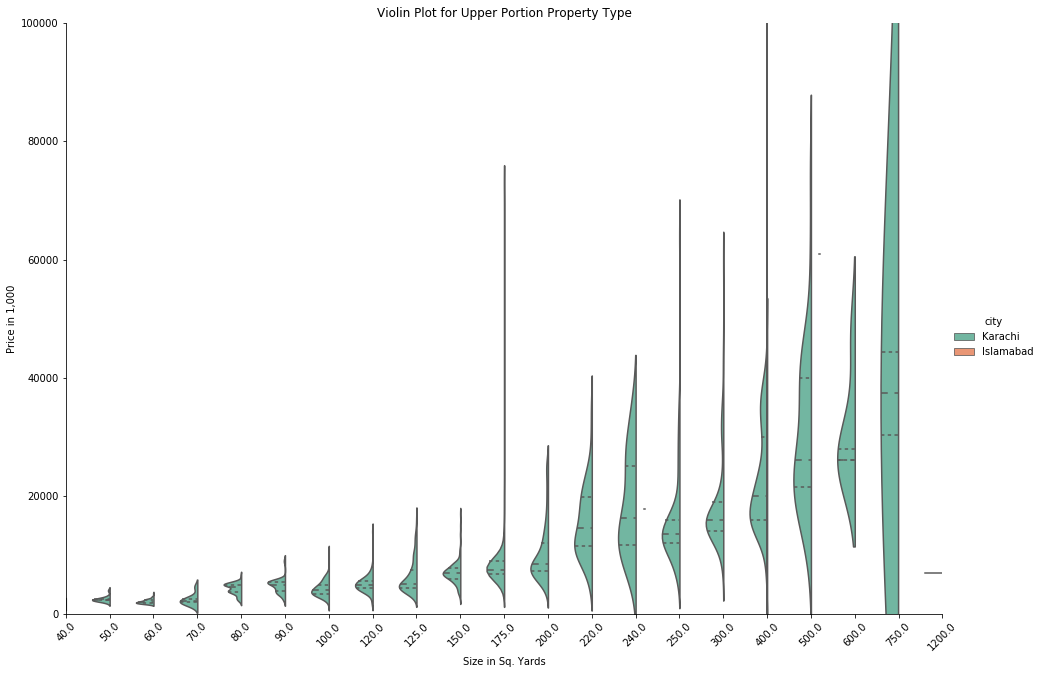

In [245]:
ax_catp_up = sns.catplot(
    data=up_por_data,
    x="Size_in_Sq_Yards",
    y="norm_p",
    hue = "city",
    kind='violin',
    height=9, 
    aspect=1.5,
    palette="Set2", 
    split=True,
    scale="count", 
    inner="quartile")

ax_catp_up.set(xlim=(0, 20),ylim=(0, 100000), xlabel = "Size in Sq. Yards", ylabel = "Price in 1,000")
ax_catp_up.set_xticklabels(rotation=45)
ax_catp_up.set(title ='Violin Plot for Upper Portion Property Type');

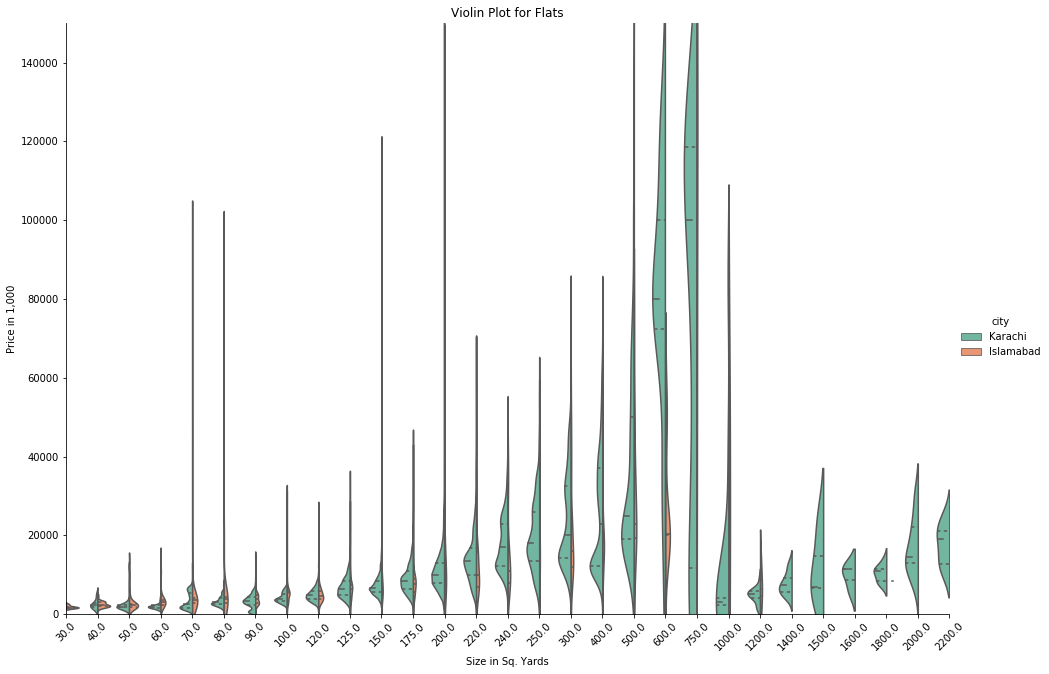

In [246]:
ax_catp_f = sns.catplot(
    data=flat_data,
    x="Size_in_Sq_Yards",
    y="norm_p",
    hue = "city",
    kind='violin',
    height=9, 
    aspect=1.5,
    palette="Set2", 
    split=True,
    scale="count", 
    inner="quartile")

ax_catp_f.set(xlim=(0, 28), ylim=(0, 150000), xlabel = "Size in Sq. Yards", ylabel = "Price in 1,000")
ax_catp_f.set_xticklabels(rotation=45)
ax_catp_f.set(title ='Violin Plot for Flats');

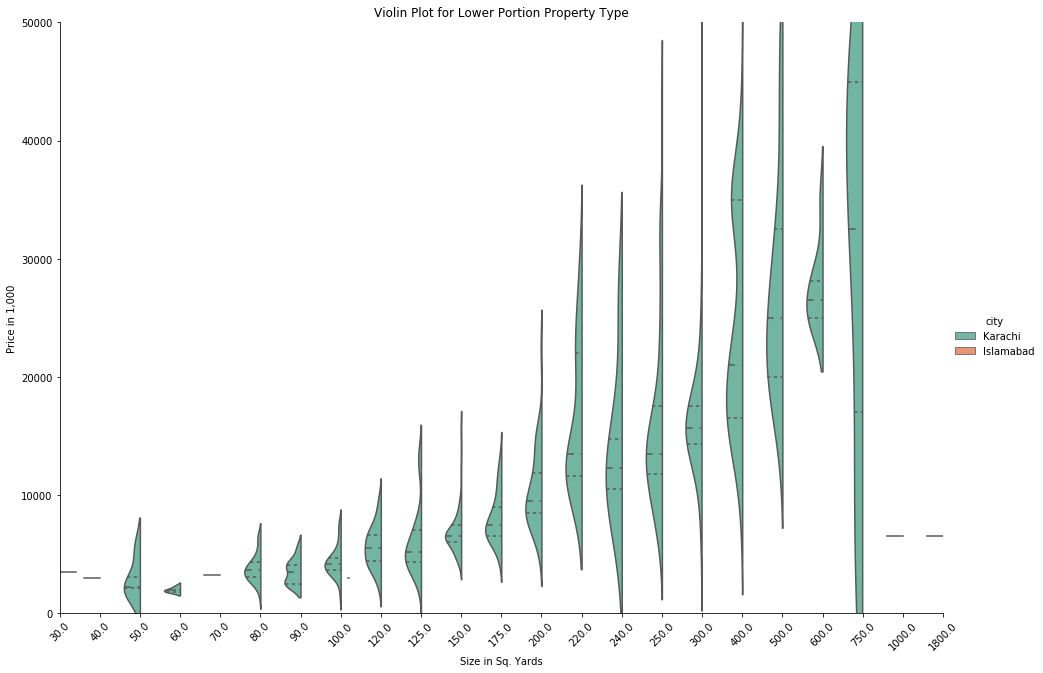

In [247]:
ax_catp_lp = sns.catplot(
    data=l_por_data,
    x="Size_in_Sq_Yards",
    y="norm_p",
    hue = "city",
    kind='violin',
    height=9, 
    aspect=1.5,
    palette="Set2", 
    split=True,
    scale="count", 
    inner="quartile")

ax_catp_lp.set(xlim=(0, 22), ylim=(0, 50000), xlabel = "Size in Sq. Yards", ylabel = "Price in 1,000")
ax_catp_lp.set_xticklabels(rotation=45)
ax_catp_lp.set(title ='Violin Plot for Lower Portion Property Type');

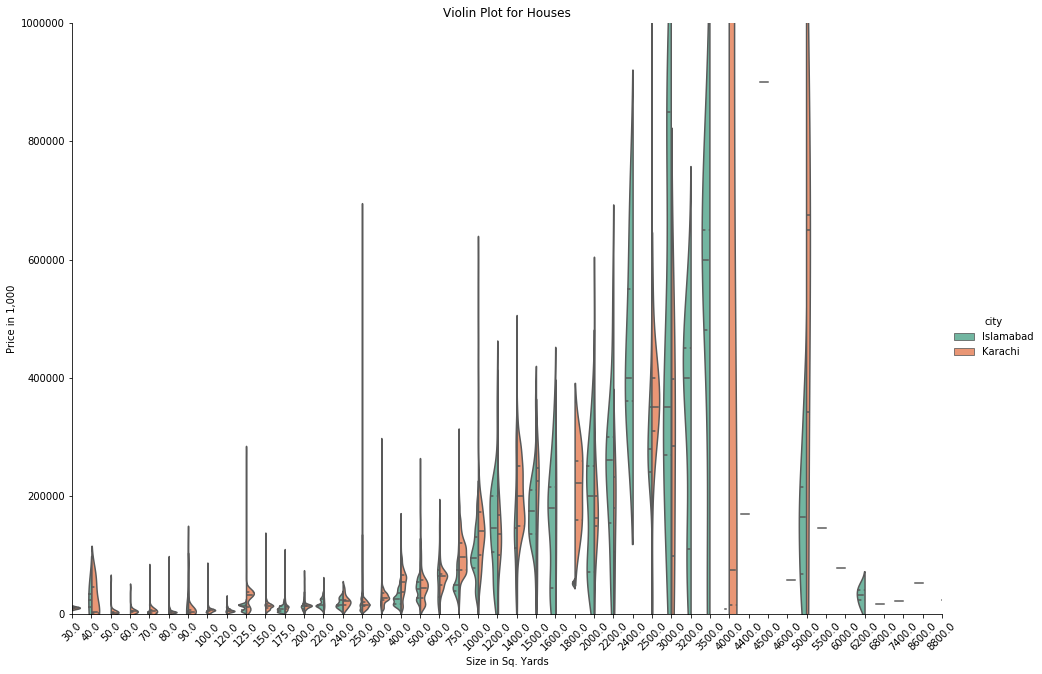

In [248]:
ax_catp_h = sns.catplot(
    data=house_data,
    x="Size_in_Sq_Yards",
    y="norm_p",
    hue = "city",
    kind='violin',
    height=9, 
    aspect=1.5,
    palette="Set2", 
    split=True,
    scale="count", 
    inner="quartile")

ax_catp_h.set(xlim=(0, 45), ylim=(0, 1000000), xlabel = "Size in Sq. Yards", ylabel = "Price in 1,000")
ax_catp_h.set_xticklabels(rotation=45)
ax_catp_h.set(title ='Violin Plot for Houses');

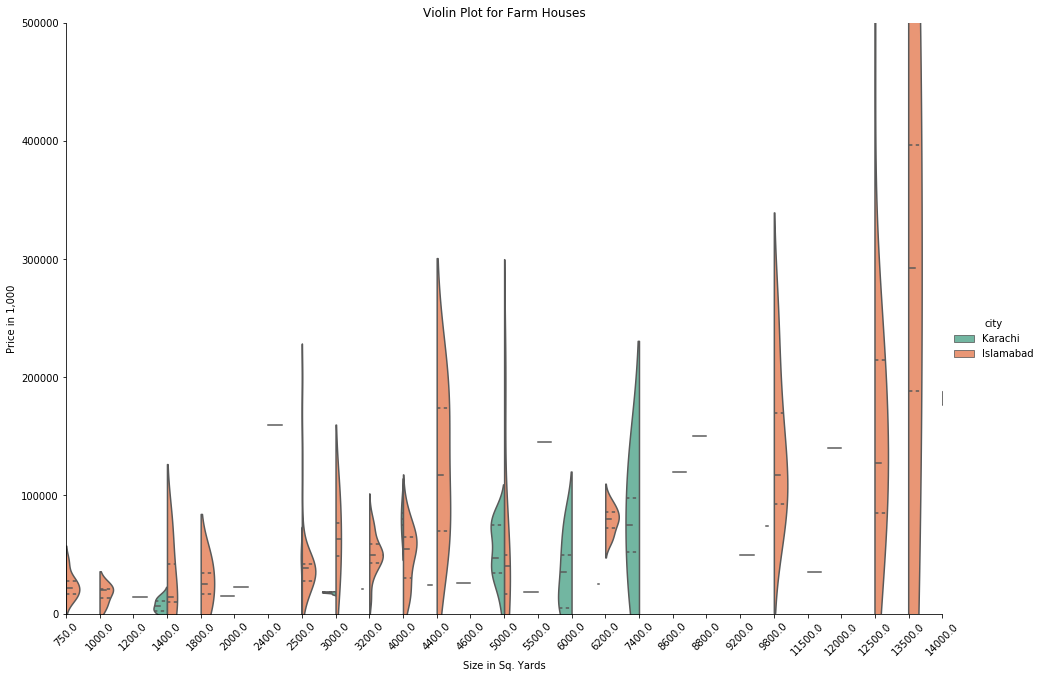

In [249]:
ax_catp_fh = sns.catplot(
    data=farmh_data,
    x="Size_in_Sq_Yards",
    y="norm_p",
    hue = "city",
    kind='violin',
    height=9, 
    aspect=1.5,
    palette="Set2", 
    split=True,
    scale="count", 
    inner="quartile")

ax_catp_fh.set(xlim=(6, 32), ylim=(0, 500000), xlabel = "Size in Sq. Yards", ylabel = "Price in 1,000")
ax_catp_fh.set_xticklabels(rotation=45)
ax_catp_fh.set(title ='Violin Plot for Farm Houses');

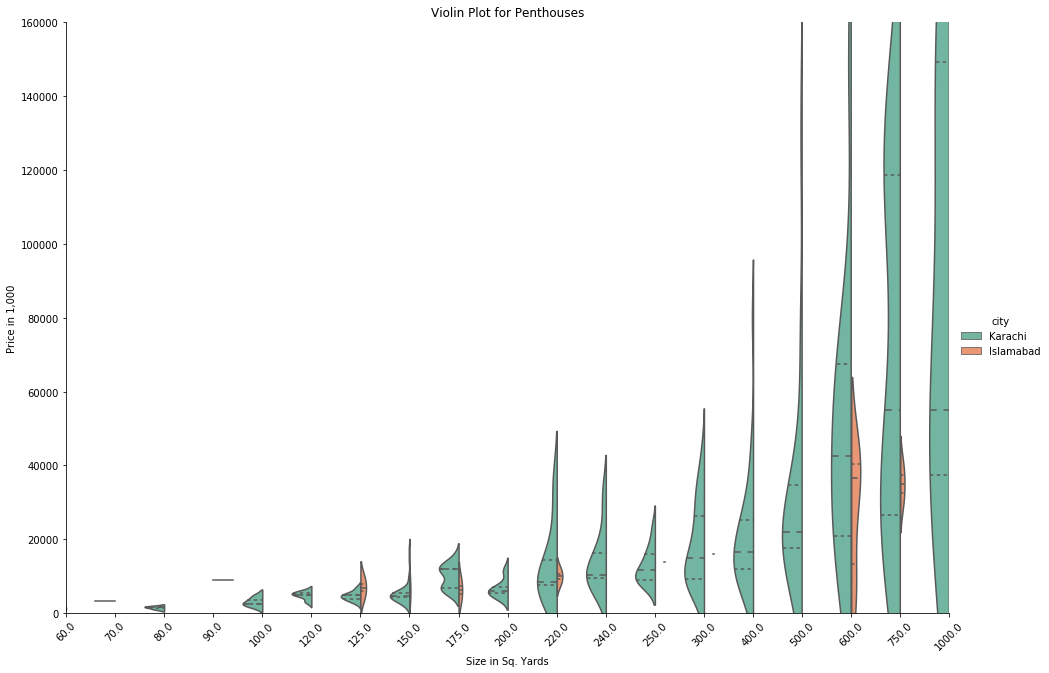

In [250]:
ax_catp_p = sns.catplot(
    data=pent_data,
    x="Size_in_Sq_Yards",
    y="norm_p",
    hue = "city",
    kind='violin',
    height=9, 
    aspect=1.5,
    palette="Set2", 
    split=True,
    scale="count", 
    inner="quartile")

ax_catp_p.set(xlim=(0, 18), ylim=(0, 160000), xlabel = "Size in Sq. Yards", ylabel = "Price in 1,000")
ax_catp_p.set_xticklabels(rotation=45)
ax_catp_p.set(title ='Violin Plot for Penthouses');

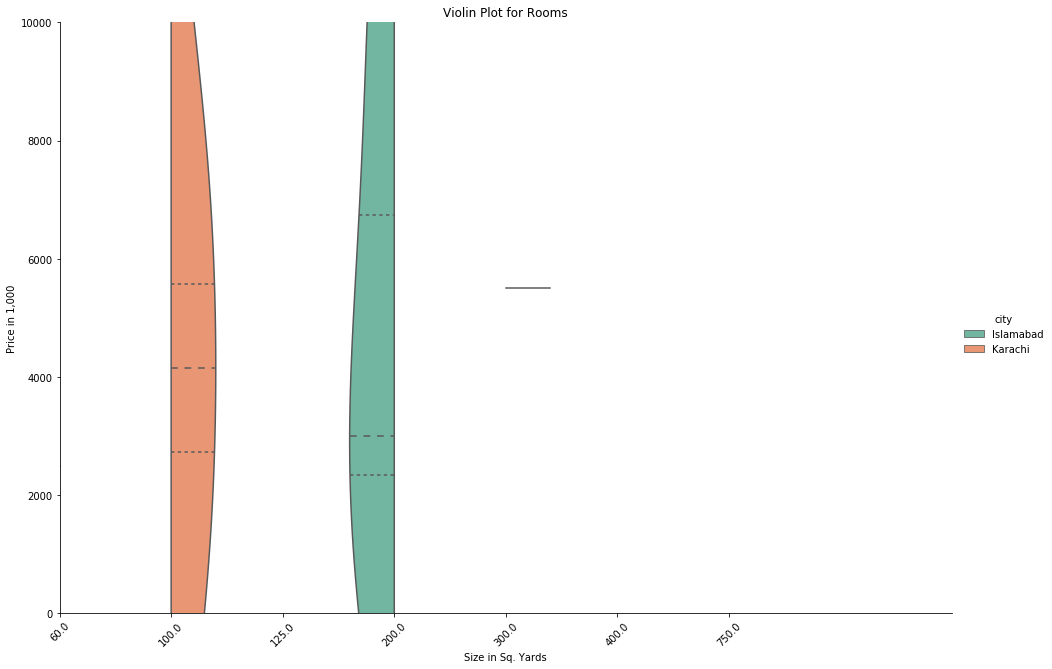

In [251]:
ax_catp_r = sns.catplot(
    data=room_data,
    x="Size_in_Sq_Yards",
    y="norm_p",
    hue = "city",
    kind='violin',
    height=9, 
    aspect=1.5,
    palette="Set2", 
    split=True,
    scale="count", 
    inner="quartile")

ax_catp_r.set(xlim=(2, 10), ylim=(0, 10000), xlabel = "Size in Sq. Yards", ylabel = "Price in 1,000")
ax_catp_r.set_xticklabels(rotation=45)
ax_catp_r.set(title ='Violin Plot for Rooms');

### This marks the end of assignment.